<a href="https://colab.research.google.com/github/altafbaba585/super-store-data-set/blob/main/super_store_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.1. Importing Libraries


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1.2. Looking into data by exploring the first five rows and columns of the data set

In [4]:
path="/content/drive/MyDrive/data set /SampleSuperstore.csv"
df = pd.read_csv(path)
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


Importing Data


In [8]:
raw_df = pd.read_csv(path)

In [9]:
raw_df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [10]:
raw_df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [11]:
raw_df.shape

(9994, 13)

In [12]:
raw_df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [13]:
raw_df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Top 10 Cities have most profit

In [14]:
raw_df['City'].unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

In [15]:
cities_profit = pd.DataFrame(raw_df.groupby('City')['Profit'].sum())
cities_profit.reset_index(inplace=True)

In [16]:
cities_profit = cities_profit.sort_values( by="Profit",ascending=False)

In [17]:
cities_profit.head(10)

,City,Profit
329,New York City,62036.9837
266,Los Angeles,30440.7579
452,Seattle,29156.0967
438,San Francisco,17507.3854
123,Detroit,13181.7908
233,Lafayette,10018.3876
215,Jackson,7581.6828
21,Atlanta,6993.6629
300,Minneapolis,6824.5846
437,San Diego,6377.1960


In [18]:
import plotly.express as px
fig = px.treemap(cities_profit,
                 path=['City' ,'Profit'],
                 color_continuous_scale='deep',
                 values='Profit',color='Profit')

fig.update_layout(width=1000, height=500)
fig.show()

Which Category sells the most and is the most profitable?

In [19]:
raw_df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [20]:
category_info = raw_df.groupby('Category').sum()
category_info

<ipython-input-20-f53064046a28>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Postal Code,Sales,Quantity,Discount,Profit
Category,,,,,
Furniture,118196026,741999.7953,8028,368.89,18451.2728
Office Supplies,330772872,719047.0320,22906,947.80,122490.8008
Technology,102603754,836154.0330,6939,244.40,145454.9481


Category With Highest Sales

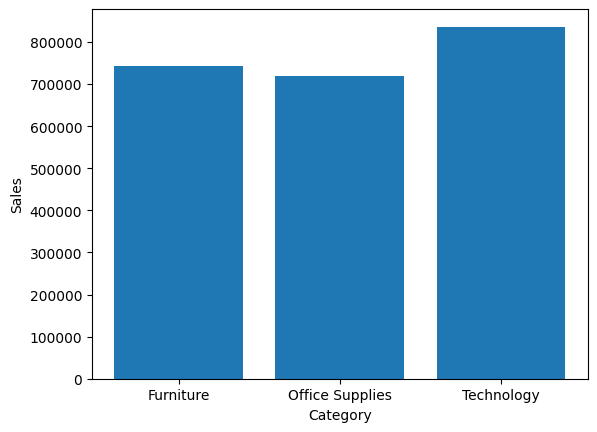

In [21]:
plt.bar(category_info.index , category_info['Sales'])
plt.xticks(category_info.index)
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()

Category With Highest Profit

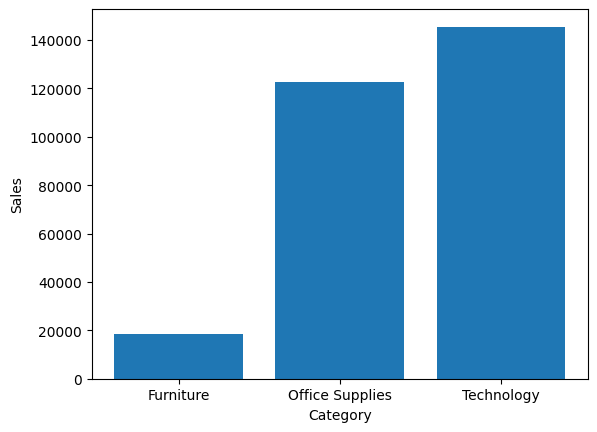

In [22]:
plt.bar(category_info.index , category_info['Profit'])
plt.xticks(category_info.index)
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()

Top 10 States have most profit

In [23]:
raw_df['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [24]:
states_profit = pd.DataFrame(raw_df.groupby('State')['Profit'].sum())
states_profit.reset_index(inplace=True)

In [25]:
states_profit = states_profit.sort_values( by="Profit",ascending=False)

In [26]:
states_profit.head(10)

,State,Profit
3,California,76381.3871
30,New York,74038.5486
45,Washington,33402.6517
20,Michigan,24463.1876
44,Virginia,18597.9504
12,Indiana,18382.9363
9,Georgia,16250.0433
15,Kentucky,11199.6966
21,Minnesota,10823.1874
6,Delaware,9977.3748


In [27]:
import plotly.express as px
fig = px.treemap(states_profit,
                 path=['State' ,'Profit'],
                 color_continuous_scale='deep',
                 values='Profit',color='Profit')
fig.update_layout(width=1000, height=500)
fig.show()

What is the most profitable sub-category?

In [28]:
raw_df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [29]:
sub_category_info = pd.DataFrame(raw_df.groupby('Sub-Category').sum())
sub_category_info.reset_index(inplace=True)
sub_category_info

<ipython-input-29-d3528a556803>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Sub-Category,Postal Code,Sales,Quantity,Discount,Profit
0,Accessories,44468434,167380.3180,2976,60.80,41936.6357
1,Appliances,25250538,107532.1610,1729,77.60,18138.0054
2,Art,43329658,27118.7920,3000,59.60,6527.7870
3,Binders,83626398,203412.7330,5974,567.00,30221.7633
4,Bookcases,12771539,114879.9963,868,48.14,-3472.5560
5,Chairs,34936229,328449.1030,2356,105.00,26590.1663
6,Copiers,3873477,149528.0300,234,11.00,55617.8249
7,Envelopes,13325731,16476.4020,906,20.40,6964.1767
8,Fasteners,12506063,3024.2800,914,17.80,949.5182
9,Furnishings,51880430,91705.1640,3563,132.40,13059.1436


In [30]:
sub_category_profit = pd.DataFrame()
sub_category_profit['Sub-Category'] = sub_category_info['Sub-Category']
sub_category_profit['Profit'] = sub_category_info['Profit']
sub_category_profit =sub_category_profit.sort_values( by="Profit",ascending=False)
sub_category_profit

,Sub-Category,Profit
6,Copiers,55617.8249
13,Phones,44515.7306
0,Accessories,41936.6357
12,Paper,34053.5693
3,Binders,30221.7633
5,Chairs,26590.1663
14,Storage,21278.8264
1,Appliances,18138.0054
9,Furnishings,13059.1436
7,Envelopes,6964.1767


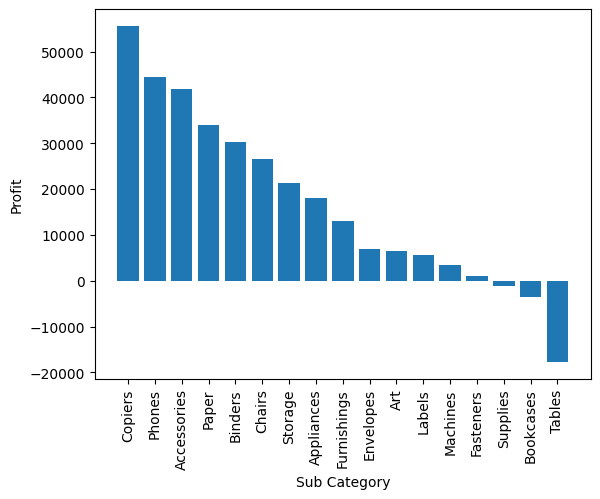

In [31]:
plt.bar(sub_category_profit['Sub-Category'] , sub_category_profit['Profit'])
plt.xticks(sub_category_profit['Sub-Category'] , rotation = "vertical")
plt.xlabel("Sub Category")
plt.ylabel("Profit")
plt.show()

What is the most popular sub-category?

In [32]:
sub_category_info

,Sub-Category,Postal Code,Sales,Quantity,Discount,Profit
0,Accessories,44468434,167380.3180,2976,60.80,41936.6357
1,Appliances,25250538,107532.1610,1729,77.60,18138.0054
2,Art,43329658,27118.7920,3000,59.60,6527.7870
3,Binders,83626398,203412.7330,5974,567.00,30221.7633
4,Bookcases,12771539,114879.9963,868,48.14,-3472.5560
5,Chairs,34936229,328449.1030,2356,105.00,26590.1663
6,Copiers,3873477,149528.0300,234,11.00,55617.8249
7,Envelopes,13325731,16476.4020,906,20.40,6964.1767
8,Fasteners,12506063,3024.2800,914,17.80,949.5182
9,Furnishings,51880430,91705.1640,3563,132.40,13059.1436


In [33]:
sub_category_popularity = pd.DataFrame()
sub_category_popularity['Sub-Category'] = sub_category_info['Sub-Category']
sub_category_popularity['Quantity'] = sub_category_info['Quantity']
sub_category_popularity =sub_category_popularity.sort_values( by="Quantity",ascending=False)
sub_category_popularity

,Sub-Category,Quantity
3,Binders,5974
12,Paper,5178
9,Furnishings,3563
13,Phones,3289
14,Storage,3158
2,Art,3000
0,Accessories,2976
5,Chairs,2356
1,Appliances,1729
10,Labels,1400


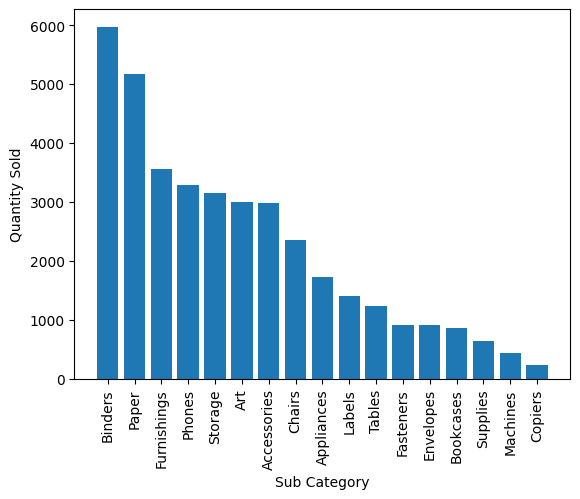

In [34]:
plt.bar(sub_category_popularity['Sub-Category'], sub_category_popularity['Quantity'])
plt.xticks(sub_category_profit['Sub-Category'] , rotation = "vertical")
plt.xlabel("Sub Category")
plt.ylabel("Quantity Sold")
plt.show()

What is the most profitable customer segment?

In [36]:
customer_segment_info = raw_df.groupby('Segment').sum()

<ipython-input-36-e9a47bf86d2c>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [37]:
customer_segment_info

,Postal Code,Sales,Quantity,Discount,Profit
Segment,,,,,
Consumer,288878609,1.161401e+06,19521,820.91,134119.2092
Corporate,164536330,7.061464e+05,11608,477.85,91979.1340
Home Office,98157713,4.296531e+05,6744,262.33,60298.6785


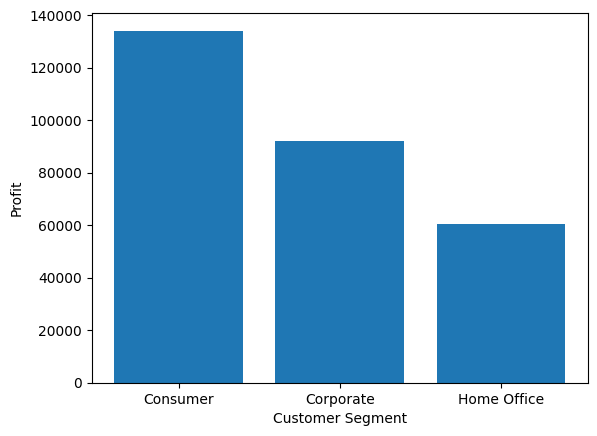

In [38]:
plt.bar(customer_segment_info.index, customer_segment_info['Profit'])
plt.xticks(customer_segment_info.index)
plt.xlabel("Customer Segment")
plt.ylabel("Profit")
plt.show()

What is the most preferred ship mode?

In [39]:
ship_mode_info = raw_df.groupby('Ship Mode').sum()

<ipython-input-39-1dd3ff573922>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [40]:
ship_mode_info

,Postal Code,Sales,Quantity,Discount,Profit
Ship Mode,,,,,
First Class,84229511,3.514284e+05,5693,253.17,48969.8399
Same Day,31242093,1.283631e+05,1960,82.75,15891.7589
Second Class,108192588,4.591936e+05,7423,270.15,57446.6354
Standard Class,327908460,1.358216e+06,22797,955.02,164088.7875


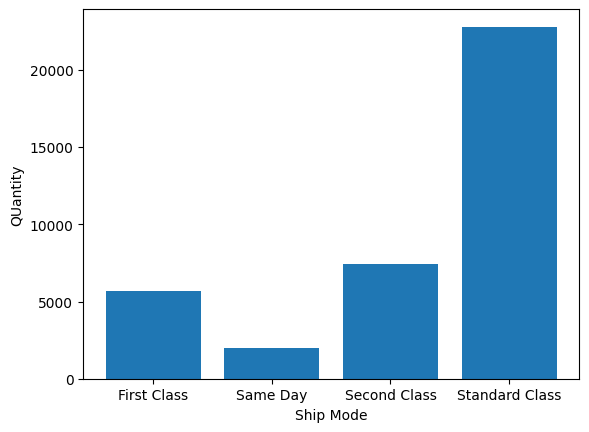

In [41]:
plt.bar(ship_mode_info.index, ship_mode_info['Quantity'])
plt.xticks(ship_mode_info.index)
plt.xlabel("Ship Mode")
plt.ylabel("QUantity")
plt.show()


What is the most profitable region?

In [42]:
raw_df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [43]:
regions_info = raw_df.groupby('Region').sum()
regions_info

<ipython-input-43-3acf2824a8fc>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Postal Code,Sales,Quantity,Discount,Profit
Region,,,,,
Central,151786150,501239.8908,8780,558.34,39706.3625
East,50171698,678781.2400,10618,414.00,91522.7800
South,55875052,391721.9050,6209,238.55,46749.4303
West,293739752,725457.8245,12266,350.20,108418.4489


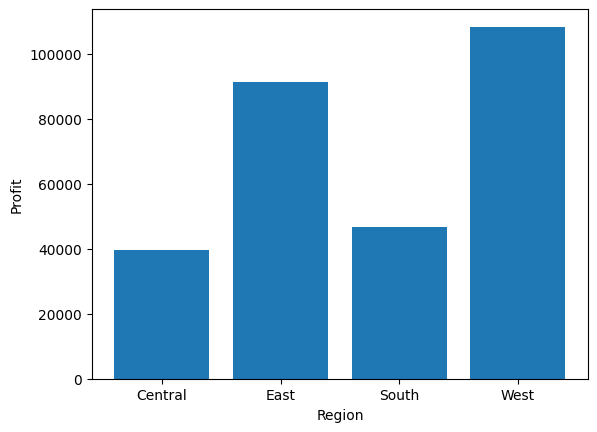

In [44]:
plt.bar(regions_info.index, regions_info['Profit'])
plt.xticks(regions_info.index)
plt.xlabel("Region")
plt.ylabel("Profit")
plt.show()

Which city has the highest sales volume?

In [45]:
city_volume = pd.DataFrame(raw_df.groupby('City')['Sales'].sum())
city_volume =city_volume.sort_values( by="Sales",ascending=False)
city_volume.head()

,Sales
City,
New York City,256368.161
Los Angeles,175851.341
Seattle,119540.742
San Francisco,112669.092
Philadelphia,109077.013


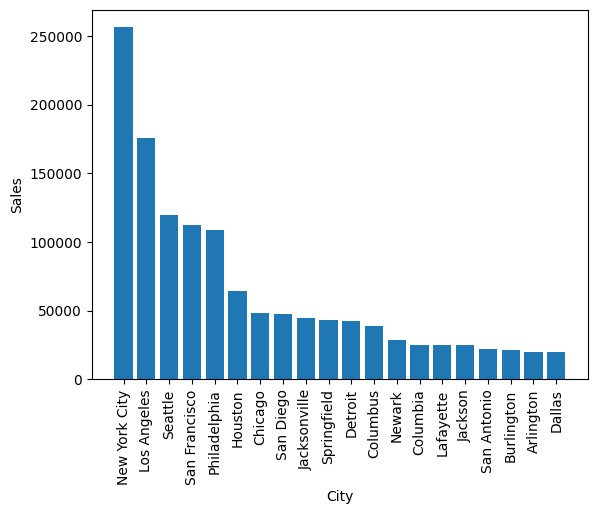

In [46]:
plt.bar(city_volume.index[0:20], city_volume['Sales'][0:20])
plt.xticks(city_volume.index[0:20],rotation = 'vertical')
plt.xlabel("City" )
plt.ylabel("Sales")
plt.show()